# <font color=blue> Cell-type identification for single-cell RNA-seq data </font>

#### MLBI@DKU, Jan 03, 2023

- __Two approaches__
    1. Marker-based identifiers utilizes only list of known cell markers
    2. Reference-based identifiers uses reference cell type annotationns
#####   
- supported __Marker-based identifiers__
    1. HiCAT
    1. Garnett
    2. SCINA
    3. scSorter
    4. scType
    5. scCatch
#####    
- supported __Reference-based identifiers__
    1. MarkerCount_Ref
    1. SingleR
    2. CaSTLe
    3. CHETAH
    4. scmap-cell
    5. scmap-cluster
#####    

In [11]:
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(scater))  
suppressPackageStartupMessages(library(xgboost))
suppressPackageStartupMessages(library(SingleCellExperiment))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(preprocessCore))
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(org.Hs.eg.db))
suppressPackageStartupMessages(library(scuttle))
suppressPackageStartupMessages(library(reticulate))

suppressPackageStartupMessages(library(SingleR))
suppressPackageStartupMessages(library(CHETAH))
suppressPackageStartupMessages(library(scmap))
suppressPackageStartupMessages(library(SCINA))
suppressPackageStartupMessages(library(scSorter))
suppressPackageStartupMessages(library(garnett))
suppressPackageStartupMessages(library(scCATCH))

library(RCTIcollection)
suppressPackageStartupMessages(library(anndata))

### Functions in RCTIcollection

In [19]:
?get_mkr_mat_from_hicat_mkr_file

In [16]:
?identify_celltypes_using_marker

In [18]:
?identify_celltypes_using_ref

### Load data to test

In [3]:
## Load test data    
file_to_test <- 'Pancreas_2K.h5ad'
data_file <- system.file("data", file_to_test, package = "RCTIcollection")

adata <- read_h5ad(data_file)
## Check data
adata

## Get gene expression matrix and obs as data frame 
df_data <- adata$to_df()
df_obs <- adata$obs

AnnData object with n_obs × n_vars = 2126 × 19127
    obs: 'cell_type', 'sample_name', 'celltype', 'celltype_major', 'cluster', 'HiCAT_subset', 'HiCAT_minor', 'HiCAT_major', 'scSorter_major', 'scSorter_minor', 'Garnett_major', 'Garnett_minor', 'SCINA_major', 'SCINA_minor', 'DigitalCellSorter_subset', 'DigitalCellSorter_minor', 'DigitalCellSorter_major', 'scType_major', 'scType_minor', 'scCatch_major', 'scCatch_minor', 'pid', 'scmap_cell_major', 'scmap_cluster_major', 'MarkerCount_major', 'CHETAH_major', 'SingleR_major', 'CaSTLe_major'
    var: 'gene_name'

### Marker-based identifiers

In [20]:
## Marker file to be used for HiCAT
taxo_level <- 'major' # 'major' or 'minor' or 'subset'
mkr_file <- 'cell_markers_rndsystems_rev_with_pancreas.tsv'

mkr_file_for_hicat <- system.file("data", mkr_file, package = "RCTIcollection")
df_mkr_mat <- get_mkr_mat_from_hicat_mkr_file( mkr_file_for_hicat, taxo_level = taxo_level, tissues = c())

In [5]:
###############
## Using HiCAT  

method <- 'HiCAT'

mkr <- mkr_file_for_hicat
df_pred <- identify_celltypes_using_marker( df_data, mkr, method = method)

df_obs[,'HiCAT_major'] <- df_pred[, 'cell_type_major']
df_obs[,'HiCAT_minor'] <- df_pred[, 'cell_type_minor']
df_obs[,'HiCAT_subset'] <- df_pred[, 'cell_type_subset']

head(df_pred)

Run HiCAT .. done.


,cell_type_major,cell_type_minor,cell_type_subset,cluster,cell_type(1st),Confidence(1st),cell_type(2nd),Confidence(2nd),cell_type_minor(1st),Confidence_minor(1st),cell_type_minor(2nd),Confidence_minor(2nd),cell_type_subset(1st),Confidence_subset(1st),cell_type_subset(2nd),Confidence_subset(2nd),cluster_rev
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
D28.1_1,Alpha cell,Alpha cell,Alpha cell,2,Alpha cell,9.751322,Gamma (PP) cell,0.8373640,Alpha cell,9.751322,Alpha cell,9.751322,Alpha cell,9.751322,Alpha cell,9.751322,2
D28.1_2,Endothelial cell,Endothelial cell,Endothelial cell,6,Endothelial cell,1.324079,Stellate cell,0.6569237,Endothelial cell,1.324079,Endothelial cell,1.324079,Endothelial cell,1.324079,Endothelial cell,1.324079,6
D28.1_3,Delta cell,Delta cell,Delta cell,10,Delta cell,5.581215,Beta cell,2.6050932,Delta cell,5.581215,Delta cell,5.581215,Delta cell,5.581215,Delta cell,5.581215,10
D28.1_4,Beta cell,Beta cell,Beta cell,5,Beta cell,5.603091,Gamma (PP) cell,1.8776273,Beta cell,5.603091,Beta cell,5.603091,Beta cell,5.603091,Beta cell,5.603091,5
D28.1_5,Ductal cell,Ductal cell,Ductal cell,18,Ductal cell,5.495905,Epithelial cell,2.8742897,Ductal cell,5.495905,Ductal cell,5.495905,Ductal cell,5.495905,Ductal cell,5.495905,18
D28.1_13,Ductal cell,Ductal cell,Ductal cell,17,Ductal cell,13.289057,Acinar cell,2.9205889,Ductal cell,13.289057,Ductal cell,13.289057,Ductal cell,13.289057,Ductal cell,13.289057,17


In [6]:
############################################
## Other marker based cell type identifiers    
methods <- c('SCINA', 'scType', 'scCatch', 'Garnett', 'scSorter') # 

for(method in methods)
{
    column <- paste0( method, '_', taxo_level )
    
    mkr <- df_mkr_mat
    
    celltype_pred <- identify_celltypes_using_marker( df_data, mkr, method = method)
    
    b <- (celltype_pred == 'Unknown') | (celltype_pred == 'Unassigned')
    celltype_pred[b] <- 'unassigned'
    df_obs[,column] <- celltype_pred
    adata$obs[,column] <- celltype_pred
}
        

SCINA running .. done.
scType running .. 

Warning message:
“The following arguments are not used: row.names”
Centering and scaling data matrix

PC_ 1 
Positive:  SCGN, PAX6, CHGB, NEUROD1, CHGA, SLC30A8, PCSK2, SCG2, KIAA1244, PAM 
	   SYT7, ENPP2, PPP1R1A, SLC7A2, MAFB, GCH1, SNAP25, VGF, SLC22A17, ISL1 
	   PCSK1N, ABCC8, INSM1, ERO1LB, MIR7-3HG, GAD2, CNIH2, PCLO, RFX6, PAK3 
Negative:  IFITM3, ZFP36L1, REST, SOX4, S100A11, CAV2, MYH9, MYL12A, LGALS3, RBPMS 
	   NFIB, TMSB4X, SH3BP4, PMEPA1, CD44, TPM1, NOTCH2, CDC42EP1, TACSTD2, LITAF 
	   YAP1, PPIC, SEL1L3, AHNAK, SPTBN1, ANXA2, CSDA, ANXA4, ANXA2P2, SAT1 
PC_ 2 
Positive:  CD24, ATP1B1, ELF3, KRT8, TACSTD2, RAB11FIP1, KIAA1522, OCLN, MAL2, KRT18 
	   CLDN4, ANXA4, CFB, KRT7, CXADR, SERPINA3, TMC5, TC2N, RASEF, CLDN1 
	   LAD1, ABCC3, PDZK1IP1, SDC4, ERBB3, GATM, TMPRSS2, CLMN, CLDN10, LCN2 
Negative:  SPARC, MRC2, COL6A3, NID1, LAMA4, COL15A1, PDGFRB, COL5A1, COL5A2, CDH11 
	   COL5A3, COL1A2, COL3A1, COL6A2, BGN, LOXL2, FBN1, COL4A1, PXDN, LTBP2 
	   IGFBP4, THBS2, LHF

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2126
Number of edges: 73159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8257
Number of communities: 12
Elapsed time: 0 seconds


ERROR: Error in sctype_score(scRNAseqData = Seurat_obj[["RNA"]]@scale.data, scaled = TRUE, : could not find function "sctype_score"


In [7]:
adata

AnnData object with n_obs × n_vars = 2126 × 19127
    obs: 'cell_type', 'sample_name', 'celltype', 'celltype_major', 'cluster', 'HiCAT_subset', 'HiCAT_minor', 'HiCAT_major', 'scSorter_major', 'scSorter_minor', 'Garnett_major', 'Garnett_minor', 'SCINA_major', 'SCINA_minor', 'DigitalCellSorter_subset', 'DigitalCellSorter_minor', 'DigitalCellSorter_major', 'scType_major', 'scType_minor', 'scCatch_major', 'scCatch_minor', 'pid', 'scmap_cell_major', 'scmap_cluster_major', 'MarkerCount_major', 'CHETAH_major', 'SingleR_major', 'CaSTLe_major'
    var: 'gene_name'

In [8]:
################
## Performances    
methods <- c('HiCAT', 'SCINA', 'scType', 'scCatch', 'Garnett', 'scSorter') # 

for(method in methods)
{
    column <- paste0( method, '_', taxo_level )
    pc <- sum(as.character(adata$obs[,'celltype_major']) == as.character(adata$obs[,column]))
    pc <- 100*pc/dim(adata$obs)[1]
    cat(sprintf('%20s: %5.2f \n', method, pc))
}


               HiCAT: 92.43 
               SCINA: 90.31 
              scType: 92.00 
             scCatch: 21.73 
             Garnett: 20.37 
            scSorter: 91.72 


### Reference-based identifiers

In [7]:
## Load reference data    
ref <- 'Pancreas_6K.h5ad'
ref_file <- system.file("data", ref, package = "RCTIcollection")

cat('Loading .. ')
flush.console()

adata_ref <- read_h5ad(ref_file)

df_data_ref <- adata_ref$to_df()
df_obs_ref <- adata_ref$obs

cat('done.\n')

Loading .. done.


In [8]:

#####################################
## Reference based cell type identifiers    
methods <- c('MarkerCount', 'SingleR', 'CHETAH', 'scmap_cell', 'scmap_cluster', 'CaSTLe') # 

for(method in methods)
{
    column <- paste0( method, '_', taxo_level )   
    cell_type_ref <- df_obs_ref[,paste0( 'celltype', '_', taxo_level )]
    
    celltype_pred <- identify_celltypes_using_ref( df_data, 
                                                   df_data_ref, cell_type_ref,
                                                   method = method, 
                                                   log_transformed = FALSE, 
                                                   undesired_lst = c('Unknown', 'Tumor'))
    
    b <- (celltype_pred == 'Unknown') | (celltype_pred == 'Unassigned')
    celltype_pred[b] <- 'unassigned'
    df_obs[,column] <- celltype_pred
    adata$obs[,column] <- celltype_pred
}

Run MarkerCount_Ref .. done.


In [9]:
adata

AnnData object with n_obs × n_vars = 2126 × 19127
    obs: 'cell_type', 'sample_name', 'celltype', 'celltype_major', 'cluster', 'HiCAT_subset', 'HiCAT_minor', 'HiCAT_major', 'scSorter_major', 'scSorter_minor', 'Garnett_major', 'Garnett_minor', 'SCINA_major', 'SCINA_minor', 'DigitalCellSorter_subset', 'DigitalCellSorter_minor', 'DigitalCellSorter_major', 'scType_major', 'scType_minor', 'scCatch_major', 'scCatch_minor', 'pid', 'scmap_cell_major', 'scmap_cluster_major', 'MarkerCount_major', 'CHETAH_major', 'SingleR_major', 'CaSTLe_major'
    var: 'gene_name'

In [10]:
################
## Performances    
methods <- c('MarkerCount', 'CHETAH', 'SingleR', 'scmap_cell', 'scmap_cluster', 'CaSTLe')

for(method in methods)
{
    column <- paste0( method, '_', taxo_level )
    pc <- sum(as.character(adata$obs[,'celltype_major']) == as.character(adata$obs[,column]))
    pc <- 100*pc/dim(adata$obs)[1]
    cat(sprintf('%20s: %5.2f \n', method, pc))
}

         MarkerCount: 89.51 
              CHETAH: 83.87 
             SingleR: 89.13 
          scmap_cell: 68.81 
       scmap_cluster: 81.70 
              CaSTLe: 77.42 


## Use Seurat to check UMAP

In [10]:
raw.data <- t(df_data)
rownames(raw.data) <- colnames(df_data)
colnames(raw.data) <- rownames(df_data)

seurat.obj <- CreateSeuratObject(counts = raw.data, min.cells = 3,  
                                 meta.data = df_obs, min.features = 200)

seurat.obj[["percent.mt"]] <- PercentageFeatureSet(seurat.obj, pattern = "^MT-")
seurat.obj <- subset(seurat.obj, subset = 
                     nFeature_RNA > 200 & nFeature_RNA < 7500 & percent.mt < 5)

seurat.obj <- NormalizeData(seurat.obj, normalization.method = "LogNormalize")
seurat.obj <- FindVariableFeatures(seurat.obj,
                                   selection.method = "vst", nfeatures = 2000)

v.genes <- VariableFeatures(object = seurat.obj)
seurat.obj <- ScaleData(seurat.obj, features = rownames(seurat.obj))
seurat.obj <- RunPCA(object = seurat.obj, features = v.genes)

##### SNN Graph Construction
seurat.obj <- FindNeighbors(object = seurat.obj,dims = 1:10)
##### Cluster Determination
seurat.obj <- FindClusters(object = seurat.obj,resolution = 0.5, verbose = FALSE)
##### Run UMAP
seurat.obj <- RunUMAP(object = seurat.obj, dims = 1:10, verbose = FALSE)

Warning message:
“The following arguments are not used: row.names”
Centering and scaling data matrix

PC_ 1 
Positive:  SCGN, PAX6, CHGB, CHGA, NEUROD1, PCSK2, SLC30A8, SCG2, KIAA1244, PAM 
	   ENPP2, SLC7A2, PPP1R1A, MAFB, GCH1, VGF, SNAP25, SLC22A17, ISL1, PCSK1N 
	   INSM1, ABCC8, ERO1LB, MIR7-3HG, CNIH2, RFX6, GAD2, PAK3, ALDH1A1, SEC11C 
Negative:  IFITM3, ZFP36L1, REST, SOX4, CAV2, S100A11, LGALS3, MYL12A, NFIB, MYH9 
	   RBPMS, TMSB4X, PMEPA1, TACSTD2, CD44, SH3BP4, CDC42EP1, TPM1, LITAF, SEL1L3 
	   NOTCH2, YAP1, ANXA4, SPTBN1, AHNAK, PPIC, ANXA2, SAT1, IFITM2, CSDA 
PC_ 2 
Positive:  SPARC, COL15A1, MRC2, LAMA4, NID1, COL6A3, PDGFRB, COL5A1, COL5A2, COL5A3 
	   CDH11, COL4A1, COL1A2, COL3A1, BGN, LOXL2, PXDN, COL6A2, LTBP2, IGFBP4 
	   FBN1, LHFP, ITGA1, THBS2, LUM, SFRP2, SRPX2, EDNRA, CYGB, SERPINE1 
Negative:  CD24, ATP1B1, ELF3, KRT8, TACSTD2, RAB11FIP1, OCLN, KIAA1522, KRT18, MAL2 
	   ANXA4, CLDN4, CFB, KRT7, SERPINA3, CXADR, TMC5, TC2N, RASEF, CLDN1 
	   LAD1, ABCC3, GA

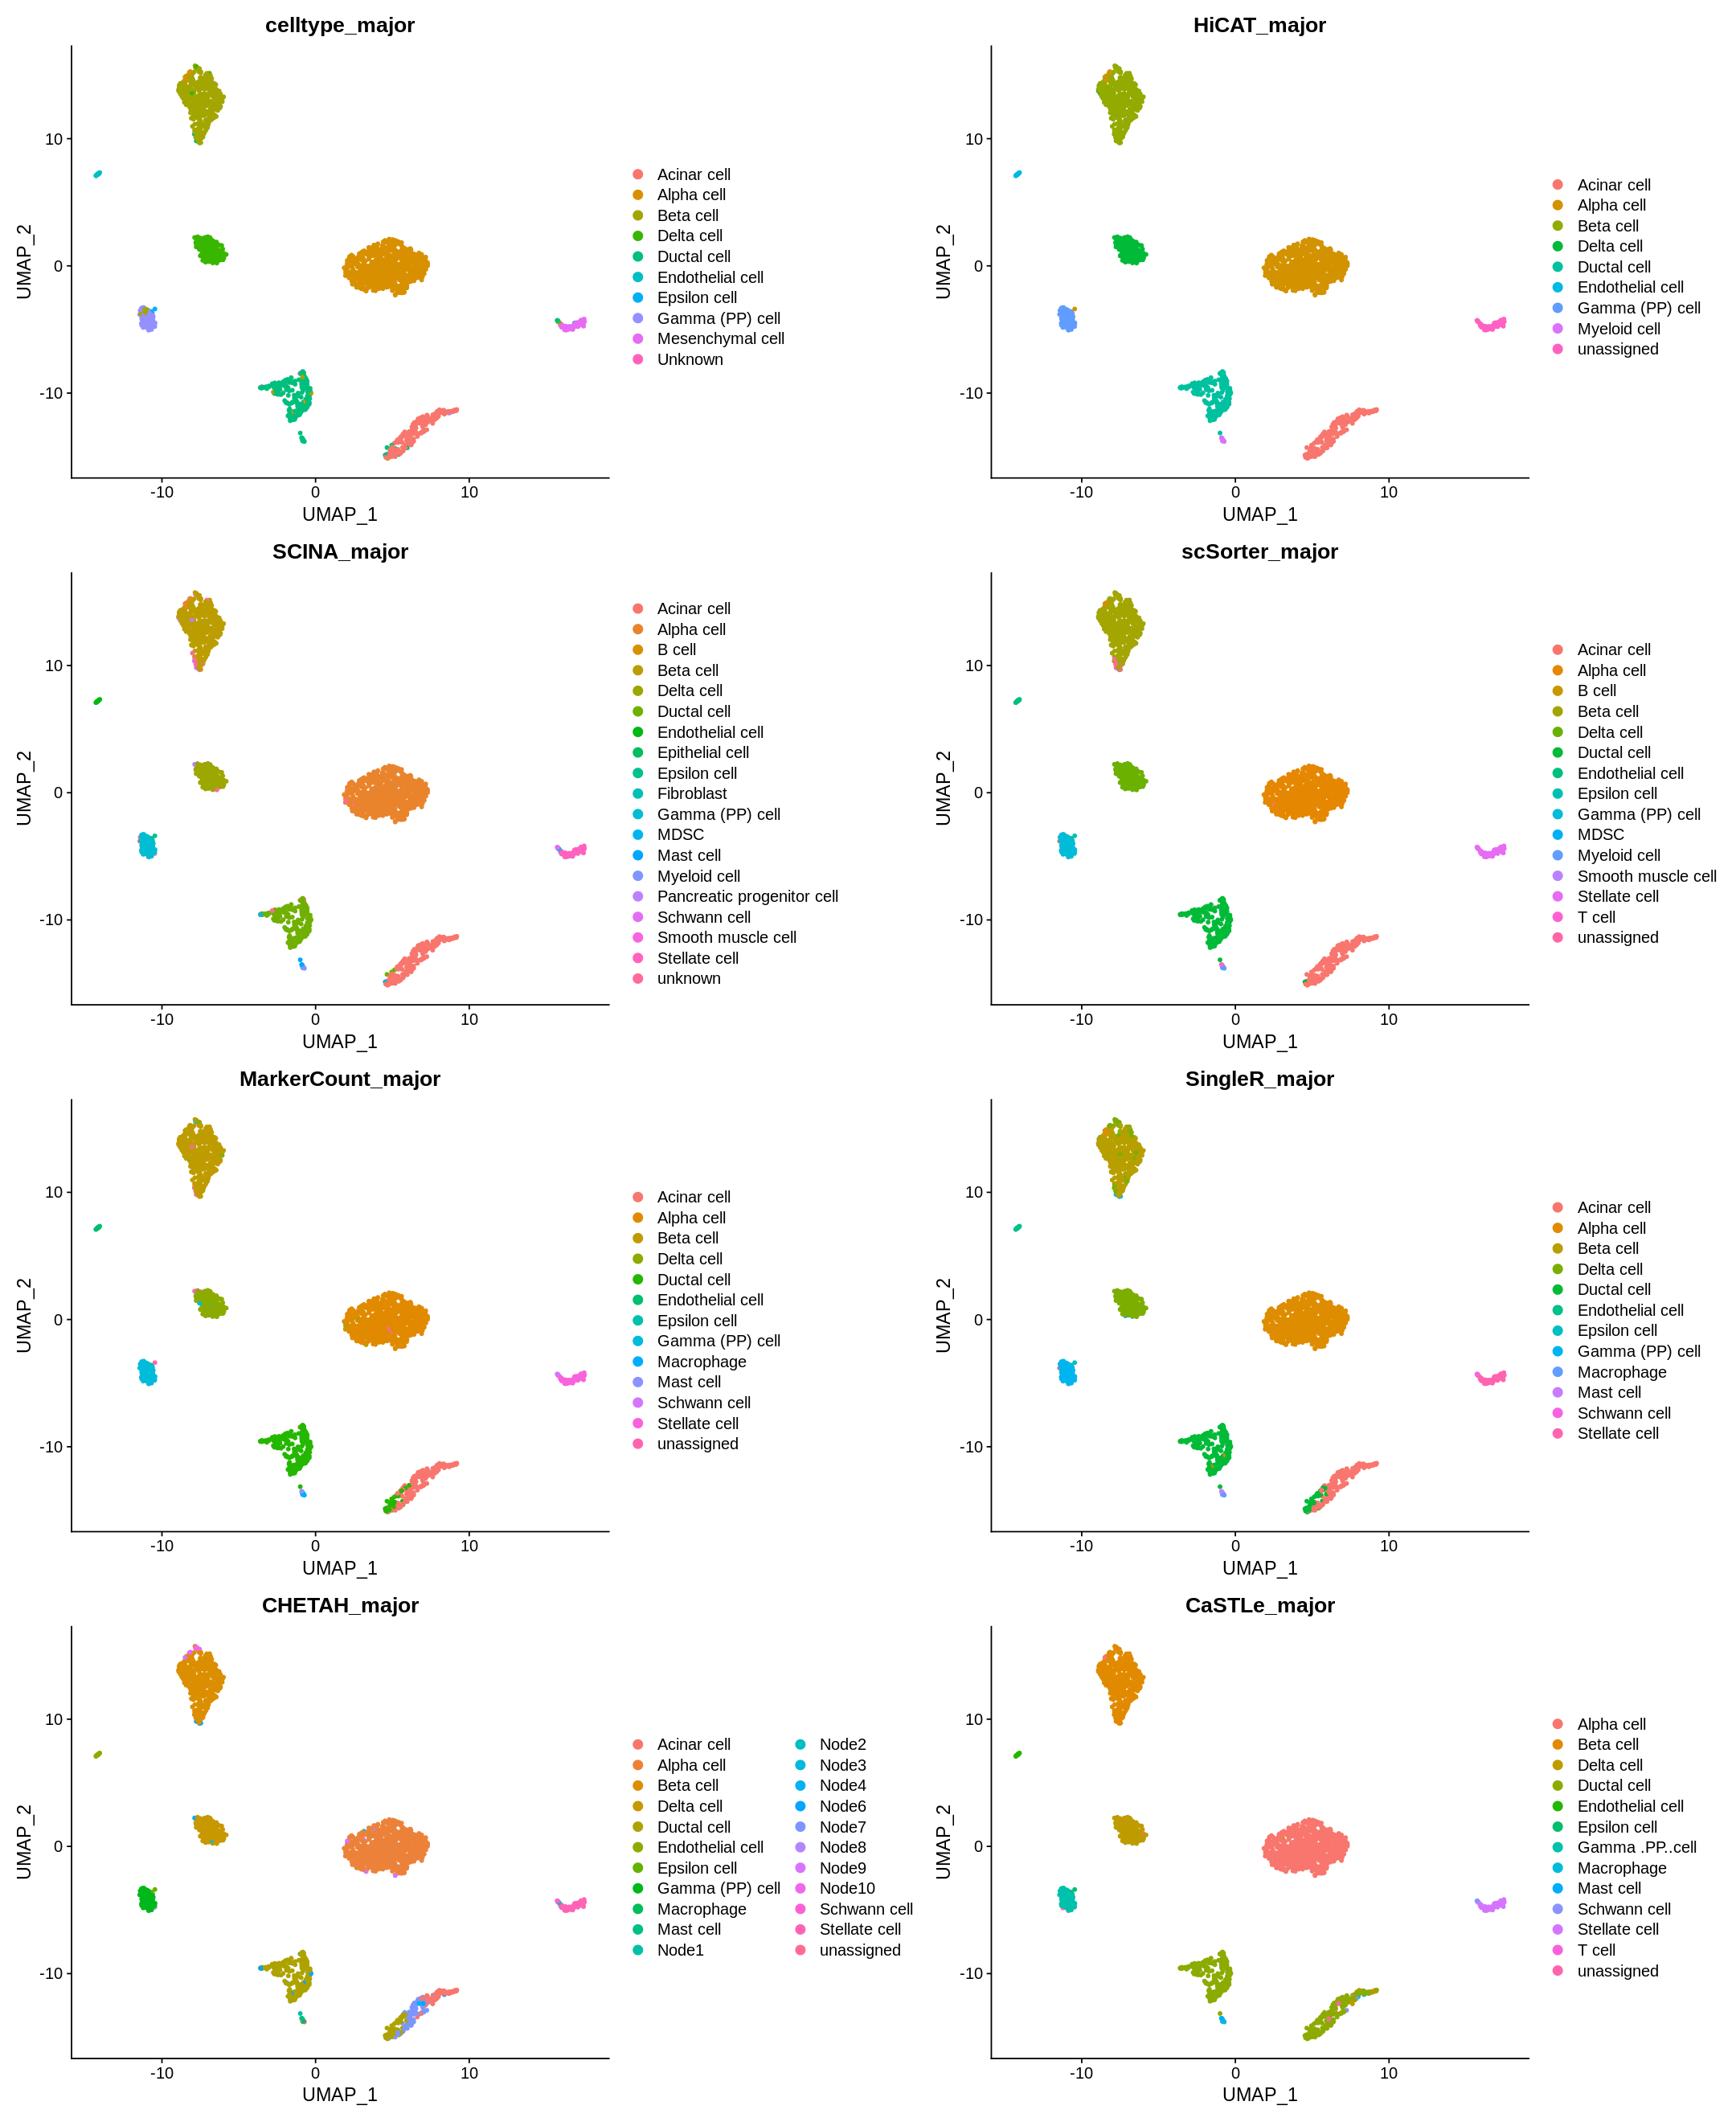

In [120]:
options(repr.plot.width=18, repr.plot.height=22)
DimPlot(seurat.obj, reduction = "umap", ncol = 2, pt.size = 1,
        group.by = c('celltype_major', 'HiCAT_major', 'SCINA_major', 'scSorter_major', 
                     'MarkerCount_major', 'SingleR_major', 'CHETAH_major', 'CaSTLe_major'))